## **Data Preparation**

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 

#models to explore
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

#metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve,recall_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#hyperparamater tuning
from sklearn.model_selection import GridSearchCV

# To ignore warnings
import warnings

warnings.filterwarnings("ignore")

In [270]:
data = pd.read_csv('loan1_data_clean.csv')

In [271]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code
X = data.drop(['BAD'],axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X = pd.get_dummies(X,drop_first=True)

# Create y(dependent varibale)
# Remove _________ and complete the code

y = data['BAD']

### **Splitting the data into 70% train and 30% test set**

In [272]:
# Split the data into training and test set
# Remove _________ and complete the code


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1) #could consider shrinking this test_size to 0.2 to allow model to have more data to train


In [273]:
#check for multicolinearity using VIF score
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()

vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
print(vif_data)

           feature        VIF
0             LOAN   5.820718
1          MORTDUE  16.478254
2            VALUE  21.250882
3              YOJ   2.634342
4            DEROG        NaN
5           DELINQ        NaN
6            CLAGE   6.735390
7             NINQ   1.856946
8             CLNO   7.842745
9          DEBTINC  16.062313
10  REASON_HomeImp   1.541104
11      JOB_Office   1.985949
12       JOB_Other   3.788271
13     JOB_ProfExe   2.418980
14       JOB_Sales   1.119273
15        JOB_Self   1.287867


In [274]:
X_train = X_train.drop(['MORTDUE'],axis=1)
X_test = X_test.drop(['MORTDUE'],axis=1)

VIF is very high, going to drop value to try to improve results

In [275]:
#check VIF again
#check for multicolinearity using VIF score
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()

vif_data['feature'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
print(vif_data)

           feature        VIF
0             LOAN   5.747172
1            VALUE   8.146459
2              YOJ   2.590048
3            DEROG        NaN
4           DELINQ        NaN
5            CLAGE   6.731102
6             NINQ   1.856716
7             CLNO   7.754828
8          DEBTINC  15.698744
9   REASON_HomeImp   1.539912
10      JOB_Office   1.983290
11       JOB_Other   3.783044
12     JOB_ProfExe   2.418016
13       JOB_Sales   1.119208
14        JOB_Self   1.283104


In [297]:
X_train.isnull().sum()

LOAN              0
VALUE             0
YOJ               0
DEROG             0
DELINQ            0
CLAGE             0
NINQ              0
CLNO              0
DEBTINC           0
REASON_HomeImp    0
JOB_Office        0
JOB_Other         0
JOB_ProfExe       0
JOB_Sales         0
JOB_Self          0
dtype: int64

Dropping value actually makes performance worse. Bad might outweight the good.
Lets try mortdue instead. This increases performance. Let's see if we drop DEBTINC if it will add any benefit also
This hurts performance. Dropping mortdue seems like the best solution for this model

X_train = X_train.drop(['DEBTINC'],axis=1)
X_test = X_test.drop(['DEBTINC'],axis=1)

if an imbalance dataset try stratify
https://stats.stackexchange.com/questions/250273/benefits-of-stratified-vs-random-sampling-for-generating-training-data-in-classi/250742#250742

In [155]:
#check for imbalnce 
data['BAD'].value_counts()

0    4771
1    1189
Name: BAD, dtype: int64

## **Model Evaluation Criterion**

In [276]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['1', '0'], yticklabels=['1', '0'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

logistic regression

In [277]:
# Defining the Logistic regression model
# Remove _________ and complete the code
#could remove value to prevent overfitting, or perform log on input variables
lr = LogisticRegression()

# Fitting the model on the training data 
# Remove _________ and complete the code

lr.fit(X_train, y_train)

LogisticRegression()

performance

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.70      0.02      0.05       817

    accuracy                           0.81      4172
   macro avg       0.76      0.51      0.47      4172
weighted avg       0.79      0.81      0.73      4172



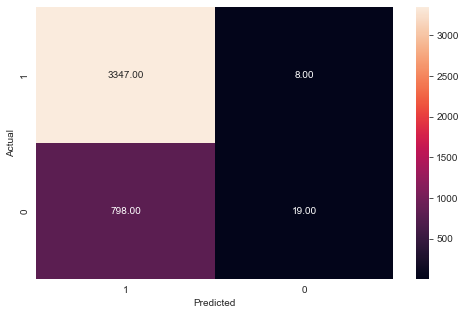

In [278]:
#Predict for train set
# Remove _________ and complete the code
predictions = lr.predict(X_train) #making the predictions

#checking the performance on the train dataset
# Remove _________ and complete the code
metrics_score(y_train, predictions) #comparing actual values to predictions

Precision tells us 81% of our predicted cases turned out to be positive (3342), recall of 1.00 suggest 100% of positives were successfuly predicton by the model. F1 gves a combined idea of both precision and recall, 89% is good.  795 false negtatives, 22 true negatives, 13 false positives.
Accuracy represents the total number of correctly classified data instance over the total number of data instances. at 81%.
The results for 1 are not good at all. Might need to rebalance the data set

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.33      0.01      0.01       372

    accuracy                           0.79      1788
   macro avg       0.56      0.50      0.45      1788
weighted avg       0.70      0.79      0.70      1788



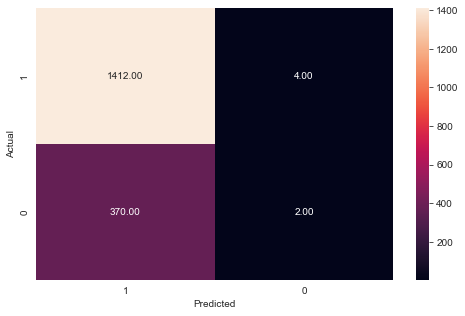

In [279]:
#Predict for test set
# Remove _________ and complete the code

test_predictions = lr.predict(X_test)

#checking the performance on the test dataset
# Remove _________ and complete the code

metrics_score(y_test, test_predictions)

Results are worse here. Lets rebalance

In [280]:
# Defining the Logistic regression model
# Remove _________ and complete the code
lr1 = LogisticRegression(solver='newton-cg',class_weight='balanced')

# Fitting the model on the training data 
# Remove _________ and complete the code

lr1.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='newton-cg')

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.70      0.02      0.05       817

    accuracy                           0.81      4172
   macro avg       0.76      0.51      0.47      4172
weighted avg       0.79      0.81      0.73      4172



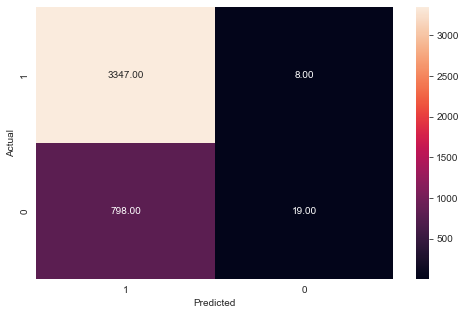

In [281]:
balance = lr1.predict(X_train)
metrics_score(y_train, predictions)

In [282]:
print('\nConfusion matrix:\n',confusion_matrix(y_train, balance))


Confusion matrix:
 [[2220 1135]
 [ 280  537]]


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Scoring for different class weights')

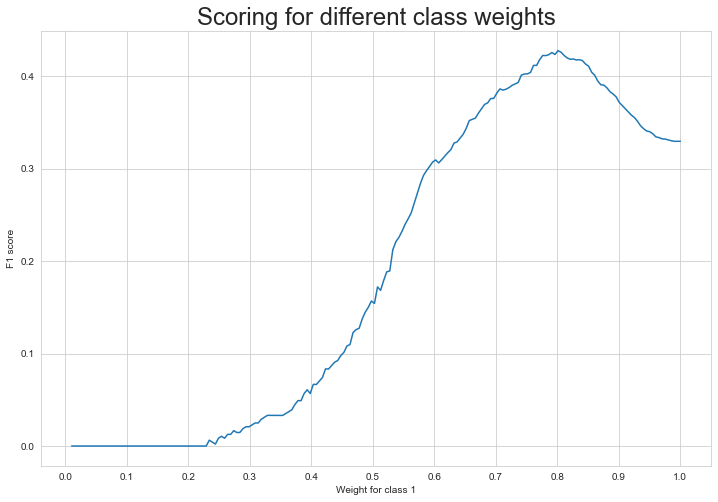

In [17]:
#using gridsearch and stratified to find optimal weights for each class
from sklearn.model_selection import GridSearchCV, StratifiedKFold
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      3355
           1       0.31      0.67      0.43       817

    accuracy                           0.65      4172
   macro avg       0.60      0.66      0.59      4172
weighted avg       0.78      0.65      0.68      4172



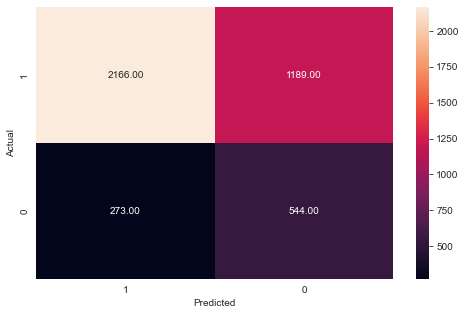

In [283]:
lr = LogisticRegression(solver='newton-cg',class_weight={0: 0.19, 1: 0.81})
lr1 = lr.fit(X_train, y_train)
balance = lr.predict(X_train)
metrics_score(y_train, balance)

              precision    recall  f1-score   support

           0       0.87      0.65      0.74      1416
           1       0.32      0.63      0.43       372

    accuracy                           0.65      1788
   macro avg       0.60      0.64      0.59      1788
weighted avg       0.76      0.65      0.68      1788



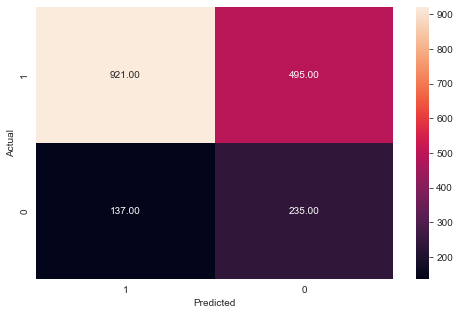

In [298]:
balance = lr.predict(X_test)
metrics_score(y_test, balance)

In [284]:
from sklearn.metrics import classification_report
print('\nClasification report:\n', classification_report(y_train, balance))
print('\nConfusion matrix:\n',confusion_matrix(y_train, balance))


Clasification report:
               precision    recall  f1-score   support

           0       0.89      0.65      0.75      3355
           1       0.31      0.67      0.43       817

    accuracy                           0.65      4172
   macro avg       0.60      0.66      0.59      4172
weighted avg       0.78      0.65      0.68      4172


Confusion matrix:
 [[2166 1189]
 [ 273  544]]


In [20]:
lr1.predict_proba(X_train)

array([[0.29692464, 0.70307536],
       [0.42744792, 0.57255208],
       [0.47204963, 0.52795037],
       ...,
       [0.84206284, 0.15793716],
       [0.35143805, 0.64856195],
       [0.6779233 , 0.3220767 ]])

Results improve for 1 and decrease in recall for 1
Not really great metrics. This might not be the correct model for the dataset

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [296]:
# Printing the coefficients of logistic regression
# Remove _________ and complete the code
ls = lr1.coef_
print('Feature names are in the same order as coefecients')
print('***'*10) 
print(X_train.columns)
print('***'*10)
print(ls)
print('***'*10)
print(lr1.intercept_)

Feature names are in the same order as coefecients
******************************
Index(['LOAN', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO',
       'DEBTINC', 'REASON_HomeImp', 'JOB_Office', 'JOB_Other', 'JOB_ProfExe',
       'JOB_Sales', 'JOB_Self'],
      dtype='object')
******************************
[[-1.41973852e-05 -2.86837933e-06 -2.39651388e-03  0.00000000e+00
   0.00000000e+00 -5.07876236e-03  2.81315712e-01 -2.69002237e-03
   7.11841762e-02  2.04937122e-01 -6.01668750e-01 -1.87469878e-01
  -2.15106374e-01  5.80636828e-01  3.37983970e-01]]
******************************
[-1.22346804]


**Insights This model is imbalanced and not learning. Even with class weight alterations an attempt to rebalance, the models performance is still poor. Could try alternates like removing highly correlated variables and performing log functions on input variables.**

### **Build a Decision Tree Model**

Tree based models are not sensitive to outliers so they don't need to be treated.

#### Data Preparation for the tree based model

In [324]:
data1 = pd.read_csv('loan_data_2_clean.csv') #read in data that hasn't had any feature engineering done

In [325]:
data1.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [326]:
#function solution to impute medians
num_data = data1.select_dtypes('number').columns.tolist()

for i in num_data:
    data1[i].fillna(data1[i].median(),inplace=True)

In [327]:
data1.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,34.818262
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,34.818262
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,34.818262
3,1,1500,65019.0,89235.5,NaN,NaN,7.0,0.0,0.0,173.466667,1.0,20.0,34.818262
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,34.818262


In [328]:
#this mode method however won't work for some reason
cat_data = data1.select_dtypes('category').columns.tolist()

for i in cat_data:
    data1[i].fillna(data1[i].mode(),inplace=True)

In [329]:
rr = 'DebtCon'
data1['REASON'].fillna(rr,inplace = True)

In [330]:
j = 'Other'
data1['JOB'].fillna(j,inplace = True)

In [331]:
data1.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

#### Separating the target variable y and independent variable x

In [332]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix
# Remove _________ and complete the code

X = data1.drop(['BAD'],axis=1)

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function
# Remove _________ and complete the code
X = pd.get_dummies(X,drop_first=True)

# Create y(dependent varibale)
# Remove _________ and complete the code

y = data1['BAD']

#### Split the data

In [345]:
# Split the data into training and test set
# Remove _________ and complete the code


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1) #could consider shrinking this test_size to 0.2 to allow model to have more data to train

In [346]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
# Remove ___________ and complete the code

dr = DecisionTreeClassifier(random_state=1)

In [347]:
#fitting Decision tree model
# Remove ___________ and complete the code
dr.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



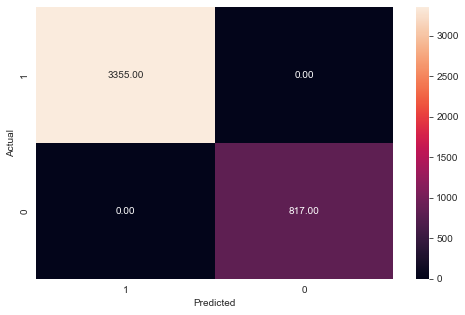

In [348]:
# Checking performance on the training data
# Remove ___________ and complete the code

dtree = dr.predict(X_train)
metrics_score(y_train, dtree)

In [349]:
print('\nClasification report:\n', classification_report(y_train, dtree))
print('\nConfusion matrix:\n',confusion_matrix(y_train, dtree))


Clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172


Confusion matrix:
 [[3355    0]
 [   0  817]]


#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1416
           1       0.71      0.60      0.65       372

    accuracy                           0.87      1788
   macro avg       0.81      0.77      0.79      1788
weighted avg       0.86      0.87      0.86      1788



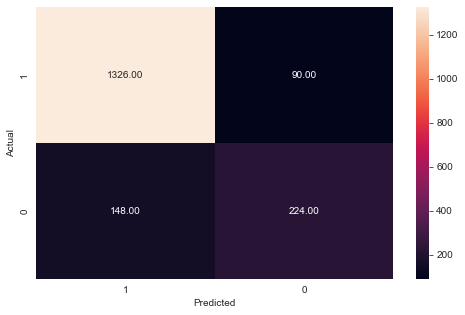

In [350]:
# Checking performance on the testing data
# Remove _________ and complete the code

dtree1 = dr.predict(X_test)
metrics_score(y_test, dtree1)

In [351]:
print('\nClasification report:\n', classification_report(y_test, dtree1))
print('\nConfusion matrix:\n',confusion_matrix(y_test, dtree1))


Clasification report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1416
           1       0.71      0.60      0.65       372

    accuracy                           0.87      1788
   macro avg       0.81      0.77      0.79      1788
weighted avg       0.86      0.87      0.86      1788


Confusion matrix:
 [[1326   90]
 [ 148  224]]


**Insights Great performance on the training data and decent performance on the test set. This difference infers that the model is overfitting. **

I changed the split to 0.3 for test to give the model a better performance on test and reduce overfitting. Decison tree automatically does feature selection so no need to remove features. Let us try to tune to reduced overfitting.

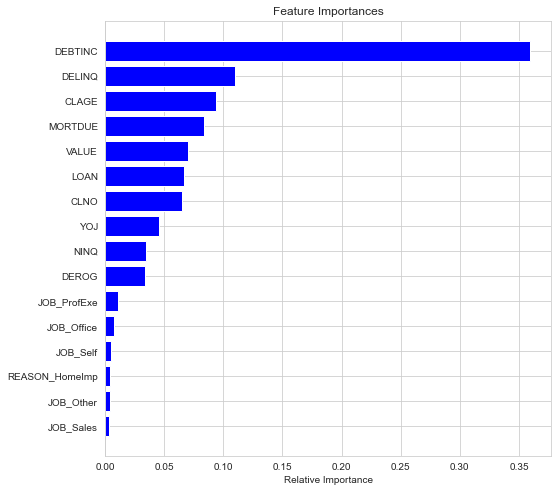

In [352]:
#feature importance from the decision tree
features = list(X.columns)

importances = dr.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (8, 8))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'blue', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

#### Using GridSearchCV for Hyperparameter tuning on the model

In [353]:
# Choose the type of classifier. 
# Remove _________ and complete the code
dtree_tuned = DecisionTreeClassifier()


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {'max_depth': np.arange(2, 8), 
              
              'criterion': ['gini','entropy'],
              
              'min_samples_leaf': [1, 3, 5, 7],
              
              'max_leaf_nodes': [2, 5, 7] + [None],
              
              'splitter': ['best', 'random']
              
             }



# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(dtree_tuned, parameters, scoring = scorer, cv = 5)


# Fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(X_train,y_train)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
dtree_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
dt = dtree_tuned.fit(X_train, y_train)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3355
           1       0.72      0.71      0.72       817

    accuracy                           0.89      4172
   macro avg       0.82      0.82      0.82      4172
weighted avg       0.89      0.89      0.89      4172



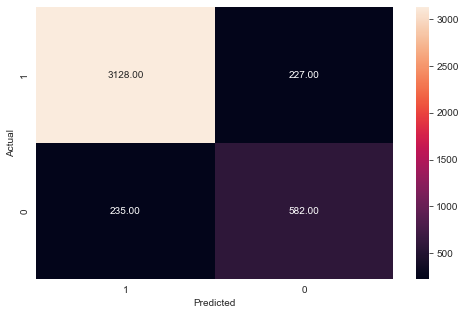

In [354]:
# Checking performance on the training data based on the tuned model
# Remove _________ and complete the code

dtree2 = dt.predict(X_train)
metrics_score(y_train, dtree2)

In [355]:
print('\nClasification report:\n', classification_report(y_train, dtree2))
print('\nConfusion matrix:\n',confusion_matrix(y_train, dtree2))


Clasification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3355
           1       0.72      0.71      0.72       817

    accuracy                           0.89      4172
   macro avg       0.82      0.82      0.82      4172
weighted avg       0.89      0.89      0.89      4172


Confusion matrix:
 [[3128  227]
 [ 235  582]]


#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1416
           1       0.75      0.68      0.71       372

    accuracy                           0.89      1788
   macro avg       0.83      0.81      0.82      1788
weighted avg       0.88      0.89      0.88      1788



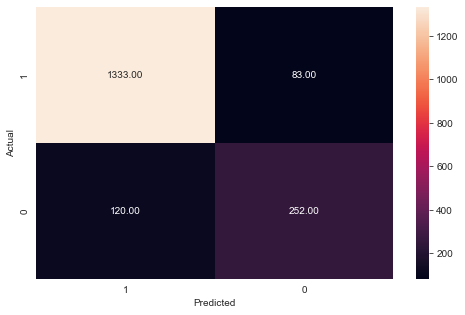

In [356]:
# Checking performance on the testing data based on the tuned model
# Remove _________ and complete the code

dtree3 = dt.predict(X_test)
metrics_score(y_test, dtree3)


In [357]:
print('\nClasification report:\n', classification_report(y_test, dtree3))
print('\nConfusion matrix:\n',confusion_matrix(y_test, dtree3))


Clasification report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      1416
           1       0.75      0.68      0.71       372

    accuracy                           0.89      1788
   macro avg       0.83      0.81      0.82      1788
weighted avg       0.88      0.89      0.88      1788


Confusion matrix:
 [[1333   83]
 [ 120  252]]


**Insights Performance drops overall for train but the data is no longer overfitting
Feels like the model is learning better for class 1. 254 correctly classified and 118 incorrectly.. Performance is better than logistic regression/**

#### Plotting the Decision Tree

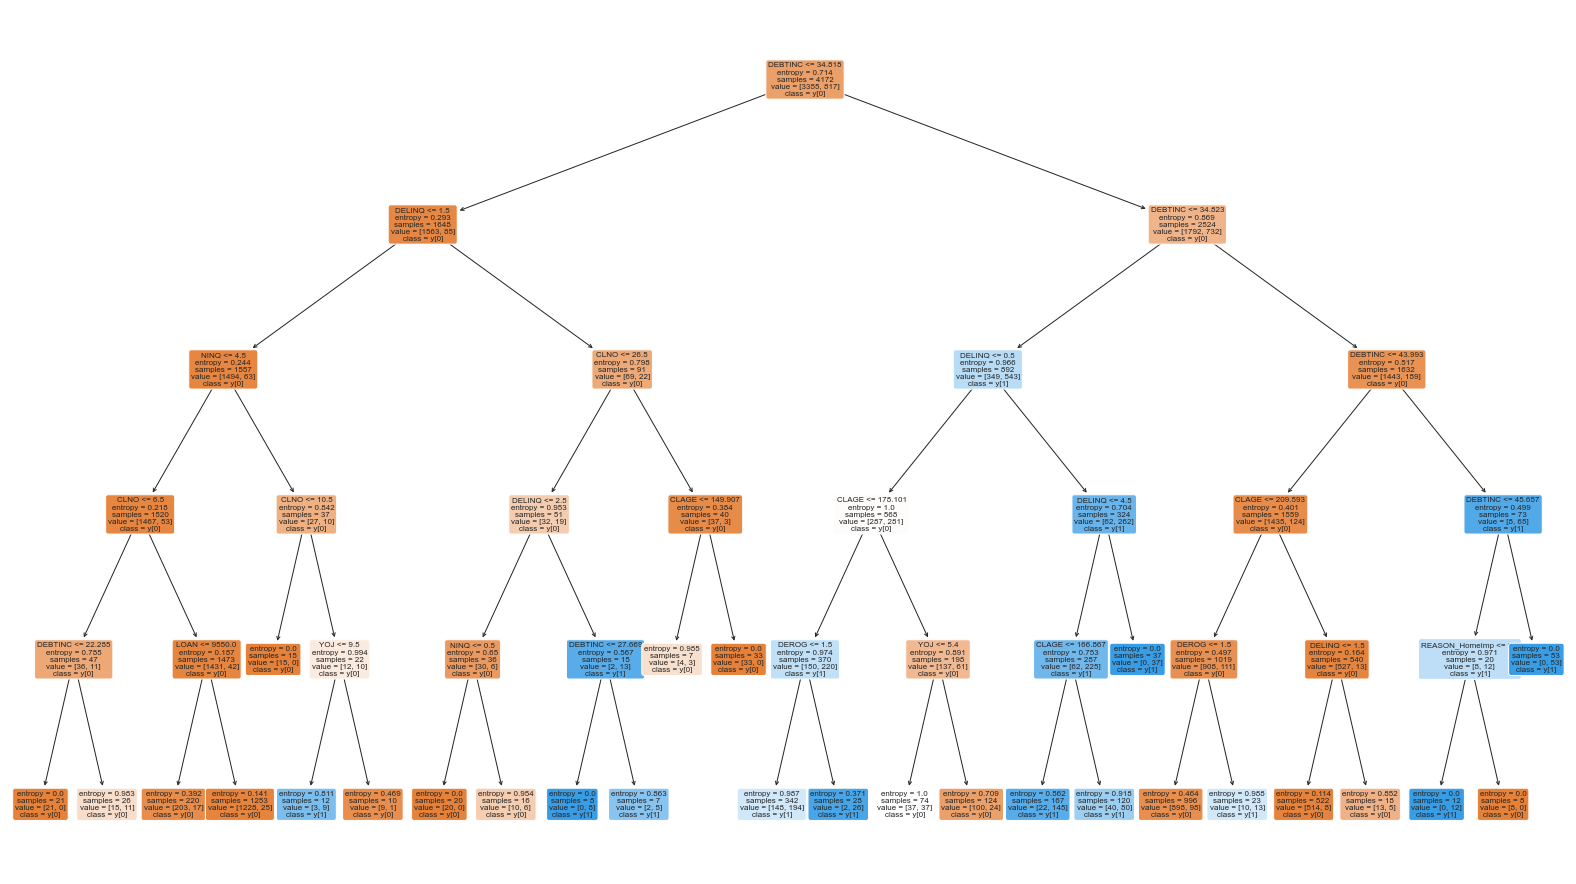

In [358]:
# Plot the decision  tree and analyze it to build the decision rule
# Remove _________ and complete the code


import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(28, 16))
plot_tree(dt, fontsize=8,
          feature_names=X_train.columns,
          class_names=True, 
          filled=True, impurity=True, 
          rounded=True)
plt.savefig('foo.png')

#### Deduce the business rules apparent from the Decision Tree and write them down: 
It appears debt incurred(DEBTINC) is the most important feature of the decision tree and the root node of the tree.

Random Forest

In [191]:
# Defining Random forest CLassifier
# Remove _________ and complete the code

rf = RandomForestClassifier(n_estimators = 100, random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



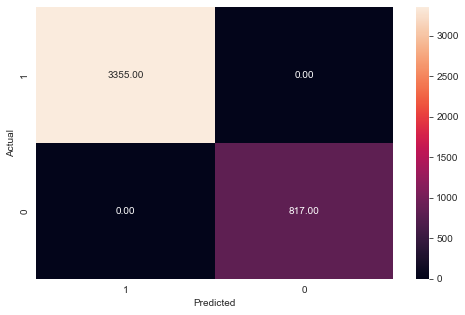

In [192]:
#Checking performance on the training data
# Remove _________ and complete the code
ranfor = rf.predict(X_train)
metrics_score(y_train, ranfor)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.91      0.69      0.79       372

    accuracy                           0.92      1788
   macro avg       0.92      0.84      0.87      1788
weighted avg       0.92      0.92      0.92      1788



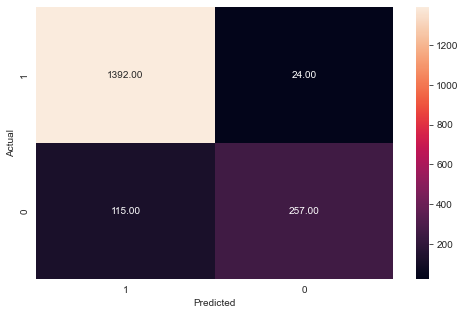

In [193]:
# Checking performance on the test data
# Remove _________ and complete the code

ranfort = rf.predict(X_test)
metrics_score(y_test, ranfort)

**Observations: Random Forest is learning well for both 0 and 1 on the training data, however it is overfitting.**

with class weights

In [194]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

# Remove _________ and complete the code

rfc = RandomForestClassifier(n_estimators = 100, random_state = 1, class_weight={0:0.2,1:0.8})


# Fitting Random Forest model
# Remove _________ and complete the code

rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



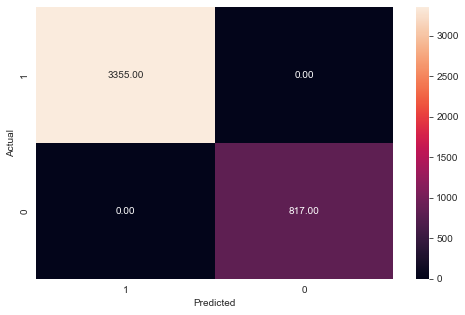

In [195]:
# Checking performance on the train data
# Remove _________ and complete the code

ranfortc = rfc.predict(X_train)
metrics_score(y_train, ranfortc)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1416
           1       0.89      0.65      0.75       372

    accuracy                           0.91      1788
   macro avg       0.90      0.82      0.85      1788
weighted avg       0.91      0.91      0.91      1788



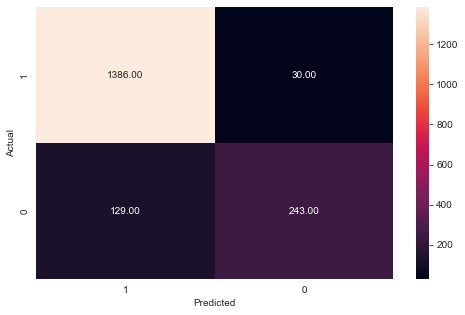

In [196]:
# Checking performance on the test data
# Remove _________ and complete the code

ranfortct = rfc.predict(X_test)
metrics_score(y_test, ranfortct)

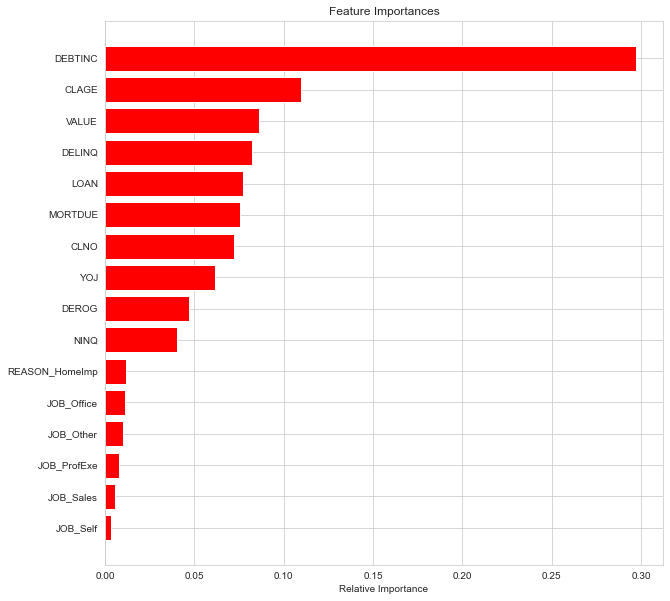

In [197]:
features = list(X.columns)

importances = rfc.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'red', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Tuning the Random Forest**

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [198]:
# Choose the type of classifier. 
# Remove _________ and complete the code
rftc = RandomForestClassifier(random_state=1,class_weight={0:0.25,1:0.75})


# Grid of parameters to choose from
# Remove _________ and complete the code
parameters = {"n_estimators": [120, 130],
              
    "max_depth": [5, 7],
              
    "max_features": [0.8, 1]
    
}


# Type of scoring used to compare parameter combinations
# Remove _________ and complete the code
scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search
# Remove _________ and complete the code
grid_obj = GridSearchCV(rftc, parameters, scoring = scorer, cv = 5)



#fit the GridSearch on train dataset
# Remove _________ and complete the code
grid_obj = grid_obj.fit(X_train,y_train)


# Set the clf to the best combination of parameters
# Remove _________ and complete the code
rf_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
# Remove _________ and complete the code
bst = rf_tuned.fit(X_train,y_train)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3355
           1       0.71      0.77      0.74       817

    accuracy                           0.89      4172
   macro avg       0.83      0.85      0.84      4172
weighted avg       0.90      0.89      0.90      4172



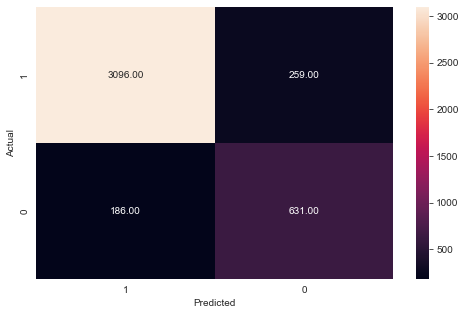

In [199]:
# Checking performance on the training data
# Remove _________ and complete the code
tuned = bst.predict(X_train)
metrics_score(y_train, tuned)

In [200]:
labels = ['0','1']
print('\nClasification report:\n', classification_report(y_train, tuned))
print('\nConfusion matrix:\n',confusion_matrix(y_train, tuned))


Clasification report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      3355
           1       0.71      0.77      0.74       817

    accuracy                           0.89      4172
   macro avg       0.83      0.85      0.84      4172
weighted avg       0.90      0.89      0.90      4172


Confusion matrix:
 [[3096  259]
 [ 186  631]]


#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1416
           1       0.72      0.72      0.72       372

    accuracy                           0.88      1788
   macro avg       0.83      0.82      0.82      1788
weighted avg       0.88      0.88      0.88      1788



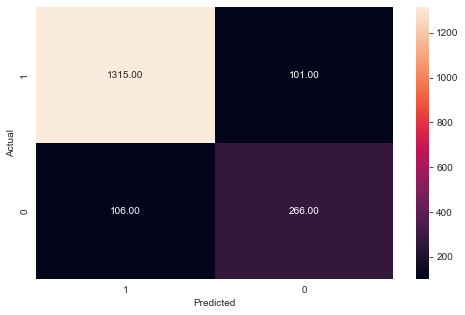

In [201]:
# Checking performace on test dataset
# Remove _________ and complete the code

tunedt = bst.predict(X_test)
metrics_score(y_test, tunedt)

**Insights: Overfitting is reduced by hyperparameter tuning. Woud like to see better perfromance.Class weights help balance out the performance as well. Performance is not bad but I would like to see the model learning better for class 1.**

#### Plot the Feature importance of the tuned Random Forest

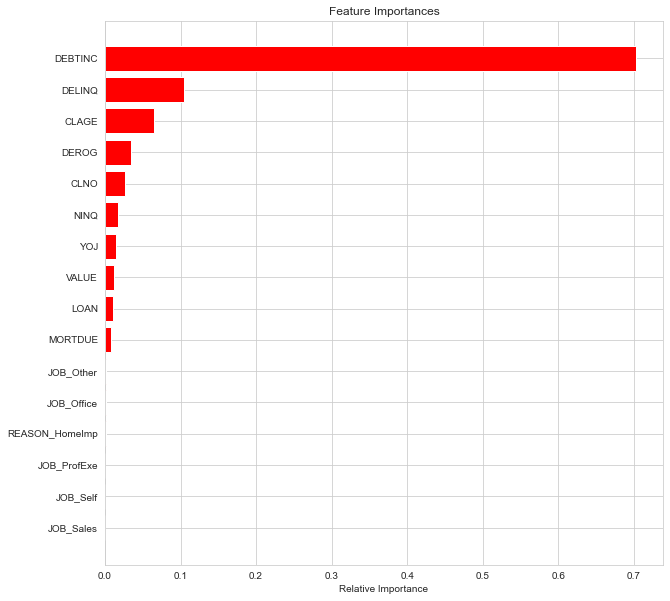

In [202]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
# Remove _________ and complete the code

features = list(X.columns)

importances = bst.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'red', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

Feature importance is showing that debtinc is the most important indicator of if someone will default or not, with delinq and clage in 2nd and 3rd. Hyperparameter tuning reduced imortance of categorical dimmy variables.

In [136]:
#LDA assumes that there is no outliers in the data so would need to use the treated data set, LDA works on continuous independent variables
#that follow a normal distribution. Would have to perform log functions on skewed data/ or treating the outliers might do the trick
#LDA assumes that each input variable has the same variance. It is almost always a good idea to standardize your data before using LDA so that it has a mean of 0 and a standard deviation of 1
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
#QDA
# Observation of each class is drawn from a normal distribution (same as LDA). QDA assumes that each class has its own covariance matrix (different from LDA).

In [ ]:
#we wouldnt use KNN because even though it is high accuracy it is highly uninterpretable.

In [137]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [138]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1903
           1       0.79      0.22      0.34       481

    accuracy                           0.83      2384
   macro avg       0.81      0.60      0.62      2384
weighted avg       0.82      0.83      0.79      2384



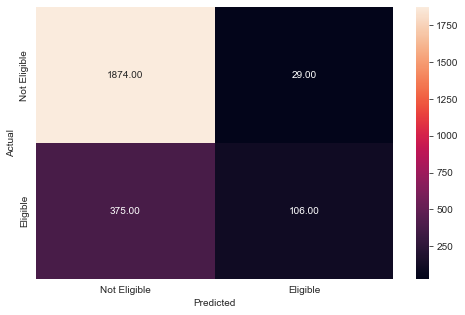

In [139]:
metrics_score(y_test, y_pred)

In [ ]:
#svc
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [360]:
!pip3 install xgboost
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



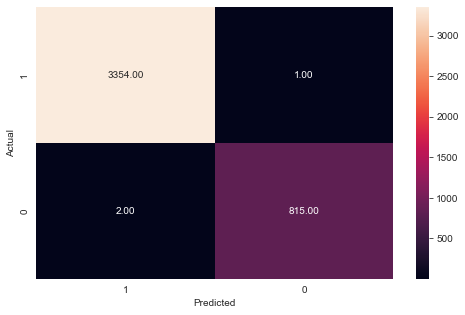

In [362]:
y_pred = model.predict(X_train)
metrics_score(y_train, y_pred)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1416
           1       0.88      0.71      0.79       372

    accuracy                           0.92      1788
   macro avg       0.90      0.84      0.87      1788
weighted avg       0.92      0.92      0.92      1788



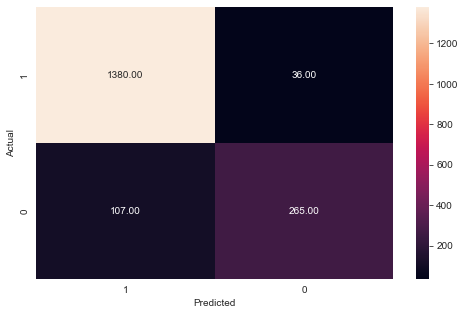

In [363]:
y_pred1 = model.predict(X_test)
metrics_score(y_test, y_pred1)